In [2]:
import pandas as pd
from matplotlib import dates as mpl_dates 
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta 
from jinja2 import Environment, FileSystemLoader
read = pd.read_csv('march_2022.csv', delimiter=',', encoding='utf8', header=None, names=["day", "time", "user", "message"])
#droping the first column because all id values are from the individual day csv files
df = read.reset_index(drop=True)
df

,day,time,user,message
0,day,time,user,message
1,2022-02-28,21:12:35,darkexile1,PauseChamp TeaTime
2,2022-02-28,21:12:36,kaitypure,pagPause 󠀀
3,2022-02-28,21:12:36,quassidi,yyjPause
4,2022-02-28,21:12:36,rangzzz,PauseChamping
...,...,...,...,...
1903679,2022-03-31,22:06:09,jeffrey6301,JINNYING
1903680,2022-03-31,22:06:09,mojojojooo0,STALLTTY KEKW
1903681,2022-03-31,22:06:09,세븐 b_7_x,bye bye yyjHey yyjLove yyjL bye bye yyjHey yyj...
1903682,2022-03-31,22:06:09,boredguy2222,KEKNye


In [5]:
today = datetime.today()
d2 = today.strftime("%B %d, %Y")
timestr = today.strftime("%Y-%m-%d")

In [6]:
emptyvalues = df[pd.isnull(df).any(axis=1)]
subscribed_at_Tier_1 = emptyvalues[emptyvalues.user.str.contains("subscribed at Tier 1")]
Total_tier1 = subscribed_at_Tier_1['user'].count()
subscribed_at_Tier_2 = emptyvalues[emptyvalues.user.str.contains("subscribed at Tier 2")]
Total_tier2 = subscribed_at_Tier_2['user'].count()
subscribed_at_Tier_3 = emptyvalues[emptyvalues.user.str.contains("subscribed at Tier 3")]
Total_tier3 = subscribed_at_Tier_3['user'].count()
subscribed_with_prime = emptyvalues[emptyvalues.user.str.contains("subscribed with Prime")]
Total_prime = subscribed_with_prime['user'].count()
gifted_subs = emptyvalues[emptyvalues.user.str.contains("gifted")]
Total_gifted = gifted_subs['user'].count()
timed_out_for = emptyvalues[emptyvalues.user.str.contains("timed out for")]
Total_time_out = timed_out_for['user'].count()
banned_from_this_channel  = emptyvalues[emptyvalues.user.str.contains("been permanently banned")]
Total_bans = banned_from_this_channel['user'].count()
d = {'Description': ["Subscribed at Tier 1", "Subscribed at Tier 2", "Subscribed at Tier 3", "Subscribed with Prime", "Gifted", "Timed Outs", "banned"], 'Total': [Total_tier1, Total_tier2, Total_tier3, Total_prime, Total_gifted, Total_time_out, Total_bans]}
moreData = pd.DataFrame(data=d)
moreData

,Description,Total
0,Subscribed at Tier 1,807
1,Subscribed at Tier 2,18
2,Subscribed at Tier 3,32
3,Subscribed with Prime,464
4,Gifted,3854
5,Timed Outs,712
6,banned,78


In [56]:
clean_wothoutNA = df.dropna()
most_used_words = pd.Series(' '.join(clean_wothoutNA['message']).split()).value_counts()[:70].reset_index()
clean1 = most_used_words.replace('󠀀', np.nan, regex=True)
text_withoutNan = clean1.dropna(axis='rows').replace({'\'':''}, {')':''}, regex=True)
text_withoutNan

#define values
values = ["The", "the", 'it', 'be', 'is', 'you', 'a', 'to', 'no', 'in', 'that', 'she', 'this', 'for', 
          'not', 'good', 'I', 'on', 'and', 'i', '1', '2', 'Lmao', 'Lol', "You", 'like', 'just', 'its', '?', 'lol', 'all', 'so', 'will',
          'of', 'are', 'they', 'bye', '⠀', 'yes', 'he', 'can', '11', 'go', 'him', 'your', 'back', 'her', 'D', 'u', 'do', 'take', 'need', 
          'more', 'why', 'have', 'what', 'with', 'dont', 'get', 'eat', 'drink', "jinny", "was", "my", "we"
          ,"nice", "too", "me", "one", "yuggie", "at", "how", "it\'s", "ye", "yea", "!bet", "hair", "milk", "🥕", "wind",
          "S", "yeah", "ok", "mode", "water", "there", "drone"]

#drop rows that contain any value in the list
textwithoutmostusedwords = text_withoutNan[text_withoutNan['index'].isin(values) == False]

#another way to search for most used words 
#df.message.value_counts().reset_index()

#--------------------------------------------------Saving in a document----------------------------------------------------------------
savetextwithoutmostusedwords = textwithoutmostusedwords.to_csv("topemotes.txt", sep=' ', header=False, index=False)
#--------------------------------------------------------------------------------------------------------------------------------------

Cleanreadytop20chatters = pd.read_csv("topemotes.txt", delimiter=' ', encoding='utf8', header=None, names=["Emote", "Times Used"])
Cleanreadytop20chatters

,Emote,Times Used
0,KEKW,76219
1,PepeLaugh,53501
2,LUL,52705
3,YEP,45670
4,yyjHey,26232
5,Clap,25591
6,xar2EDM,23898
7,yyjPopcorn,22834
8,yyjPog,22282
9,KEKInsane,22226


In [8]:
top20Chatters = df.user.value_counts()[:20].reset_index()

In [9]:
nametop_1 = [None] * 20
Searching_by_User_top_1 = [None] * 20
Searching_by_UserTop_1_emote = [None] * 20
textwithoutmostusedwords_byuser1 = [None] * 20
topemotefromtop1chatter = [None] * 20
howManyTimesWasUsedThe_topemotefrom_top1chatter = [None] * 20
topemotefromtop_1chatter_second_emote = [None] * 20
howManyTimesWasUsedThe_topemotefrom_top_1chatter_second_emote = [None] * 20

for m in range(20):
    nametop_1[m] = top20Chatters.loc[m, 'index']
    Searching_by_User_top_1[m] = df[(df["user"] == nametop_1[m]) & (df["message"] )]
    Searching_by_UserTop_1_emote[m] = pd.Series(' '.join(Searching_by_User_top_1[m]['message']).split()).value_counts()[:15].reset_index().replace('󠀀', np.nan, regex=True).dropna(axis='rows')
    textwithoutmostusedwords_byuser1[m] = Searching_by_UserTop_1_emote[m][Searching_by_UserTop_1_emote[m]['index'].isin(values) == False].reset_index()
    topemotefromtop1chatter[m] = textwithoutmostusedwords_byuser1[m].loc[0, 'index']
    howManyTimesWasUsedThe_topemotefrom_top1chatter[m] = textwithoutmostusedwords_byuser1[m].loc[0,0]
    topemotefromtop_1chatter_second_emote[m] = textwithoutmostusedwords_byuser1[m].loc[1, 'index']
    howManyTimesWasUsedThe_topemotefrom_top_1chatter_second_emote[m] = textwithoutmostusedwords_byuser1[m].loc[1,0]


In [10]:
tota_unique_chatters = len(df.user.value_counts())
tota_unique_chatters

33255

In [11]:
first_message = datetime.strptime(df.time.iloc[1], '%H:%M:%S')
last_message = datetime.strptime(df.time.iloc[-1], '%H:%M:%S')
Total_Hours_streamed = last_message - first_message
print(Total_Hours_streamed)

0:53:34


In [12]:
print("top chatters of", d2)
#total messages
topChatters = df.user.value_counts().reset_index()
totalChatters = int(topChatters['user'].sum())
print("Messages logged today =", totalChatters)
plot_index_Totalmsg = str('Total Messages ') +  str(totalChatters)
#total 20 chatters
top20Chatters = df.user.value_counts()[:20].reset_index()
totalTop20Chatters = int(top20Chatters['user'].sum())
print("Sum of total 20 messages =",totalTop20Chatters)
percentageTop20Chatter = round(((totalTop20Chatters / totalChatters) * 100) , 2)
print("Perentage of Top 20 chatters =", percentageTop20Chatter)
plot_index_top20 = str('Percentage of Top 20 ') +  str(percentageTop20Chatter)
#total 5 chatters
top5Chatters = df.user.value_counts()[:5].reset_index()
totalTop5Chatters = int(top5Chatters['user'].sum())
print("Sum of total 5 messages =",totalTop5Chatters)
percentageTop5Chatter = round(((totalTop5Chatters / totalChatters) * 100) , 2)
print("Perentage of Top 5 chatters =", percentageTop5Chatter)
plot_index_top5 = str('Percentage of Top 5 ') +  str(percentageTop5Chatter) 

top20Chatters['Most used emote by user'] = pd.Series(topemotefromtop1chatter)

top20Chatters['Times used'] = pd.Series(howManyTimesWasUsedThe_topemotefrom_top1chatter)

top20Chatters['Second most used emote by user'] = pd.Series(topemotefromtop_1chatter_second_emote)

top20Chatters['Total for second emote'] = pd.Series(howManyTimesWasUsedThe_topemotefrom_top_1chatter_second_emote)

top20Chatters.to_csv('top20Chatters.csv', header=False, index=False,)

notopChatter = totalChatters - totalTop20Chatters

top20withouttop5 = totalTop20Chatters - totalTop5Chatters

print("other messeges", notopChatter)
print("top 20 with out Top 5", top20withouttop5)
print("tatal messeges from top 5 ",totalTop5Chatters)
print("total messges",notopChatter + top20withouttop5 + totalTop5Chatters)



top chatters of April 01, 2022
Messages logged today = 1903684
Sum of total 20 messages = 388348
Perentage of Top 20 chatters = 20.4
Sum of total 5 messages = 155674
Perentage of Top 5 chatters = 8.18
other messeges 1515336
top 20 with out Top 5 232674
tatal messeges from top 5  155674
total messges 1903684


In [57]:
prueba = clean_wothoutNA.day.value_counts().reset_index()
prueba

,index,day
0,2022-03-31,124856
1,2022-03-02,124106
2,2022-03-05,119563
3,2022-03-06,114871
4,2022-03-27,100225
5,2022-03-14,94973
6,2022-03-17,83591
7,2022-03-21,83570
8,2022-03-23,83513
9,2022-03-24,81602


In [68]:
monhts = ['2022-02-28', '2022-03-31', '2022-03-02' ]
drop_index_from_Searching_by_User  = [None] * len(monhts)
Searching_by_day = [None] * len(monhts)
for day in monhts:
    Searching_by_day = df[(df["day"] == day)]
    drop_index_from_Searching_by_User = len(Searching_by_day[day].user.value_counts())


TypeError: list indices must be integers or slices, not str

TypeError: 'int' object is not subscriptable

In [16]:
prueba2 = clean_wothoutNA.groupby('day').sum()
prueba2

,time,user,message
day,,,
2022-02-28,21:12:3521:12:3621:12:3621:12:3621:12:3721:12:...,darkexile1kaitypurequassidirangzzzallexxx1996y...,PauseChamp TeaTimepagPause 󠀀yyjPausePauseChamp...
2022-03-01,00:00:0000:00:0000:00:0000:00:0000:00:0000:00:...,y_expallexxx1996nitemareobscurecurr_redlandoml...,PepeLaughPepeLaughkevin pawned it KappaPepeLau...
2022-03-02,01:54:3201:54:3201:54:3401:54:3401:54:3401:54:...,y_expallexxx1996sizzlaasinclair_bearrn6602immi...,pagPause TeaTime 󠀀 󠀀 󠀀 󠀀 󠀀 󠀀 󠀀 󠀀pagPause TeaT...
2022-03-03,00:00:0000:00:0000:00:0000:00:0000:00:0000:00:...,nitemareobscurehueso447raiforenvegasgirldarrow...,"@moderndogz, @wf_twitch @darrow35 Susge Susge..."
2022-03-04,00:00:0000:00:0100:00:0300:00:0300:00:0300:00:...,ellesimwunderlandskysagetysonwangisthemany_exp...,KreygasmKreygasmI ilike beaches LUpeepoPopcorn...
2022-03-05,10:14:5410:14:5410:14:5510:14:5510:14:5510:14:...,sirhanniballecter_super_stream_servery_expspea...,PauseChamp TeaTimeScene switched to LivepagPa...
2022-03-06,00:00:0000:00:0000:00:0000:00:0000:00:0100:00:...,batssssssspeaceful85greatjamesmonkeyos11_mrmsi...,pepeWit is just a showno candyWICKED i hear th...
2022-03-07,21:06:0521:06:0521:06:0521:06:0621:06:0621:06:...,dainty_angelay_expdixgoquassidikeith_2008hatew...,ratJAMpeepoShortOnAGoose yyjRun 󠀀 󠀀 󠀀 󠀀 󠀀 󠀀 󠀀 ...
2022-03-08,00:00:0000:00:0000:00:0100:00:0100:00:0100:00:...,ecor__castriniplaylife20robindesucheekywaltzbe...,NOTEDKEKW JIMBO LOGICNo logicnoshe's actually ...


In [ ]:
readytop20chatters = pd.read_csv('top20Chatters.csv', encoding='utf8', header=None, names=["User", "Total", "Most used emote", "Times used", "Second most used emote", "Times used 2"])
readytop20chatters['Top'] = pd.Series(["1", "2", "3", "4", "5", "6","7","8","9","10","11","12","13","14","15", "16", "17", "18", "19", "20"])
readytop20chatters = readytop20chatters[['Top', "User", "Total", "Most used emote", "Times used", "Second most used emote", "Times used 2"]]

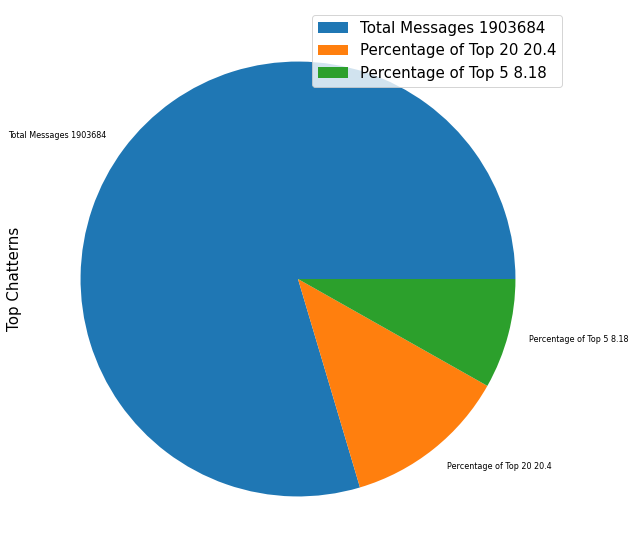

In [ ]:
plt.rcParams['font.size'] = 15
top_chatters_frame = pd.DataFrame({'Top Chatterns' : [notopChatter, top20withouttop5, totalTop5Chatters]}, index=[plot_index_Totalmsg, plot_index_top20, plot_index_top5])
top_chatters_frame
plot = top_chatters_frame.plot.pie(y='Top Chatterns', figsize=(10, 10), fontsize=8)
plt.savefig('plot2')

In [ ]:
# 2. Create a template Environment
env = Environment(loader=FileSystemLoader('templates'))

# 3. Load the template from the Environment
template = env.get_template('report_template.html')
# 4. Render the template with variables
html = template.render(page_title_text='My_report',
                       title_text='Jinnytty Stream report',
                       Day=d2,
                       top20Chatters_text='Top 20 Chatters',
                       totalChatters=totalChatters,
                       totalTop20Chatters=totalTop20Chatters,
                       percentageTop20Chatter=percentageTop20Chatter,
                       totalTop5Chatters=totalTop5Chatters,
                       percentageTop5Chatter=percentageTop5Chatter,
                       readytop20chatters=readytop20chatters,
                       MostUsedEmote_text='Most used Emote',
                       Cleanreadytop20chatters=Cleanreadytop20chatters,
                       totalChatters_text= totalChatters,
                       totalTop20Chatters_text=totalTop20Chatters,
                       percentageTop20Chatter_text=percentageTop20Chatter,
                       totalTop5Chatters_text=totalTop5Chatters,
                       percentageTop5Chatter_text=percentageTop5Chatter,
                       tota_unique_chatters=tota_unique_chatters,
                       Total_Hours_stream=Total_Hours_streamed,
                       topchatterspie_text='Top Chatters Pie',
)

# 5. Write the template to an HTML file
with open('html_report_jinja.html', 'w', encoding="utf-8") as f:
    f.write(html)